In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils

import matplotlib.pyplot as plt

In [3]:
num_classes = 10

# Step 1. Data Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [0]:
# Step 2. Model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
# Step 3. Loss,Optimizer, Metric
model.compile (optimizer= 'rmsprop', 
                loss='categorical_crossentropy', metrics = ['accuracy'])

In [6]:
# Step 4. Train the model
history=model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=2,
                  validation_split=0.2)
print(model.summary())


W0723 10:47:20.758610 139944742811520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 - 13s - loss: 0.3229 - accuracy: 0.9045 - val_loss: 0.1465 - val_accuracy: 0.9558
Epoch 2/15
48000/48000 - 13s - loss: 0.1266 - accuracy: 0.9656 - val_loss: 0.1198 - val_accuracy: 0.9693
Epoch 3/15
48000/48000 - 13s - loss: 0.0983 - accuracy: 0.9758 - val_loss: 0.1189 - val_accuracy: 0.9701
Epoch 4/15
48000/48000 - 13s - loss: 0.0862 - accuracy: 0.9792 - val_loss: 0.1304 - val_accuracy: 0.9723
Epoch 5/15
48000/48000 - 13s - loss: 0.0794 - accuracy: 0.9818 - val_loss: 0.1733 - val_accuracy: 0.9697
Epoch 6/15
48000/48000 - 13s - loss: 0.0723 - accuracy: 0.9839 - val_loss: 0.2016 - val_accuracy: 0.9666
Epoch 7/15
48000/48000 - 13s - loss: 0.0684 - accuracy: 0.9855 - val_loss: 0.1611 - val_accuracy: 0.9698
Epoch 8/15
48000/48000 - 13s - loss: 0.0648 - accuracy: 0.9862 - val_loss: 0.1535 - val_accuracy: 0.9735
Epoch 9/15
48000/48000 - 13s - loss: 0.0553 - accuracy: 0.9885 - val_loss: 0.1585 - val_accuracy: 0.9759
Epoch

In [7]:
# Step 5. Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss = ', test_loss, 'test_acc = ', test_acc)

10000/10000 [==============================] - 1s 135us/sample - loss: 0.2136 - accuracy: 0.9725
test_loss =  0.2136462909308104 test_acc =  0.9725


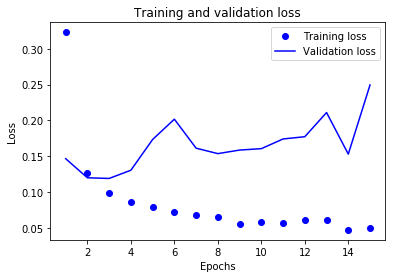

In [8]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

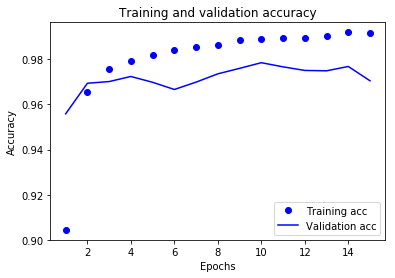

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()